# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merged_df = mouse_metadata.merge(study_results, how = 'left')
# Display the data table for preview
merged_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [4]:
# Checking the number of mice.
nmice = merged_df['Mouse ID'].nunique()
nmice

249

In [5]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
dupe_mice = merged_df.loc[merged_df.duplicated(subset=['Mouse ID', 'Timepoint']),'Mouse ID'].unique()
dupe_mice

array(['g989'], dtype=object)

In [6]:
# Optional: Get all the data for the duplicate mouse ID. 
dupe_mice_df = merged_df.loc[merged_df["Mouse ID"] == "g989", :]
dupe_mice_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0


In [7]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = merged_df.loc[merged_df["Mouse ID"] != "g989", :]
clean_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [8]:
# Checking the number of mice in the clean DataFrame.
cnmice = clean_df['Mouse ID'].nunique()
cnmice

248

## Summary Statistics

In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
mean = clean_df["Tumor Volume (mm3)"].groupby(clean_df["Drug Regimen"]).mean()
median = clean_df["Tumor Volume (mm3)"].groupby(clean_df["Drug Regimen"]).median()
var = clean_df["Tumor Volume (mm3)"].groupby(clean_df["Drug Regimen"]).var()
std = clean_df["Tumor Volume (mm3)"].groupby(clean_df["Drug Regimen"]).std()
sem = clean_df["Tumor Volume (mm3)"].groupby(clean_df["Drug Regimen"]).sem()
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
sum_df = pd.DataFrame({"Mean Vol.": mean,
                       "Median Vol.":median,
                      "Varience":var, 
                       "STD Deviation":std, 
                       "STD Error":sem})

sum_df.head()

,Mean Vol.,Median Vol.,Varience,STD Deviation,STD Error
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466


In [10]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen
sum2_df = clean_df.groupby(["Drug Regimen"])[["Tumor Volume (mm3)"]].agg(["mean","median","var","std","sem"])
# Using the aggregation method, produce the same summary statistics in a single line.
sum2_df.head()

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466

In [11]:
#Initialize the varible for the graphs
plot_nmice = clean_df["Drug Regimen"].value_counts()

## Bar and Pie Charts

Text(0.5, 1.0, 'Drug Regimen Over Time')

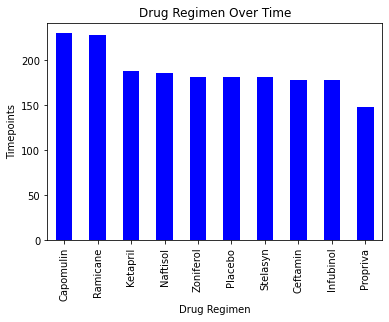

In [12]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
plot_p = plot_nmice.plot.bar(color = "blue")
plt.xlabel("Drug Regimen")
plt.ylabel("Timepoints")
plt.title("Drug Regimen Over Time")

([<matplotlib.axis.XTick at 0x118caea5048>,
 <a list of 10 Text major ticklabel objects>)

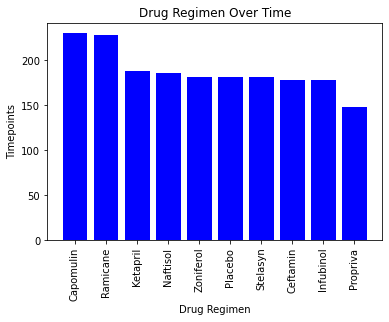

In [13]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
x_axis = plot_nmice.index.values
y_axis = plot_nmice.values

tick_locations = []
for x in x_axis:
    tick_locations.append(x)

plt.bar(x_axis, y_axis, color = 'blue', align = 'center')
plt.xlabel("Drug Regimen")
plt.ylabel("Timepoints")
plt.title("Drug Regimen Times")
plt.xticks(tick_locations, rotation = 90)


In [14]:
#Initialize the varible for the graphs
fvm_count = clean_df["Sex"].value_counts()

Text(0.5, 1.0, '# of Mice: Female vs Male')

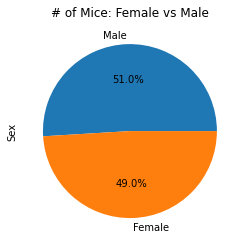

In [15]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
fvm_count.plot.pie(autopct = "%1.1f%%")
plt.title("# of Mice: Female vs Male")

Text(0.5, 1.0, '# of Mice: Female vs Male')

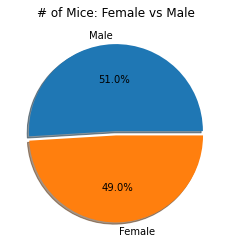

In [16]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
explode = (0, 0.05)
labels = ['Male', 'Female']
plt.pie(fvm_count, autopct = '%1.1f%%', explode = explode, shadow = True, labels = labels)
plt.title('# of Mice: Female vs Male')

## Quartiles, Outliers and Boxplots

In [17]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
capo = clean_df.loc[clean_df["Drug Regimen"] == "Capomulin", :]
rami = clean_df.loc[clean_df["Drug Regimen"] == "Ramicane", :]
infu = clean_df.loc[clean_df["Drug Regimen"] == "Infubinol", :]
ceft = clean_df.loc[clean_df["Drug Regimen"] == "Ceftamin", :]
# Start by getting the last (greatest) timepoint for each mouse        
capo_max = capo.groupby('Mouse ID').max()['Timepoint']
capo_df = pd.DataFrame(capo_max)

rami_max = rami.groupby('Mouse ID').max()['Timepoint']
rami_df = pd.DataFrame(rami_max)

infu_max = infu.groupby('Mouse ID').max()['Timepoint']
infu_df = pd.DataFrame(infu_max)

ceft_max = ceft.groupby('Mouse ID').max()['Timepoint']
ceft_df = pd.DataFrame(ceft_max)

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
capo_merge = pd.merge(capo_df, clean_df, on=("Mouse ID","Timepoint"),how="left")
rami_merge = pd.merge(rami_df, clean_df, on=("Mouse ID","Timepoint"),how="left")
infu_merge = pd.merge(infu_df, clean_df, on=("Mouse ID","Timepoint"),how="left")
ceft_merge = pd.merge(ceft_df, clean_df, on=("Mouse ID","Timepoint"),how="left")

In [18]:
capo_merge.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,b128,45,Capomulin,Female,9,22,38.982878,2
1,b742,45,Capomulin,Male,7,21,38.939633,0
2,f966,20,Capomulin,Male,16,17,30.485985,0
3,g288,45,Capomulin,Male,3,19,37.074024,1
4,g316,45,Capomulin,Female,22,22,40.159220,2


In [19]:
rami_merge.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a411,45,Ramicane,Male,3,22,38.407618,1
1,a444,45,Ramicane,Female,10,25,43.047543,0
2,a520,45,Ramicane,Male,13,21,38.810366,1
3,a644,45,Ramicane,Female,7,17,32.978522,1
4,c458,30,Ramicane,Female,23,20,38.342008,2


In [20]:
infu_merge.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a577,30,Infubinol,Female,6,25,57.031862,2
3,a685,45,Infubinol,Male,8,30,66.083066,3
4,c139,45,Infubinol,Male,11,28,72.226731,2


In [21]:
ceft_merge.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a275,45,Ceftamin,Female,20,28,62.999356,3
1,b447,0,Ceftamin,Male,2,30,45.000000,0
2,b487,25,Ceftamin,Female,6,28,56.057749,1
3,b759,30,Ceftamin,Female,12,25,55.742829,1
4,f436,15,Ceftamin,Female,3,25,48.722078,2


In [22]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin","Ramicane","Infubinol","Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
capo_tumor = capo_merge["Tumor Volume (mm3)"]
rami_tumor = rami_merge["Tumor Volume (mm3)"]
infu_tumor = infu_merge["Tumor Volume (mm3)"]
ceft_tumor = ceft_merge["Tumor Volume (mm3)"]


tumor_vols =[]
# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [23]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.



## Line and Scatter Plots

Text(0, 0.5, 'Tumor Volume (mm3)')

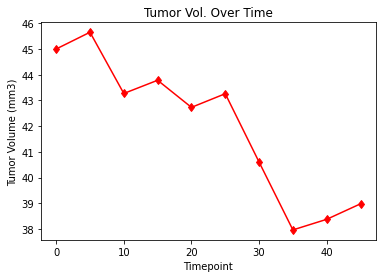

In [36]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
one_mouse = clean_df.loc[clean_df["Mouse ID"] == "b128", :]
x_axis = one_mouse["Timepoint"].count()
plt.plot(one_mouse["Timepoint"], one_mouse["Tumor Volume (mm3)"], marker = 'd', color = "red")
plt.title("Tumor Vol. Over Time")
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")

In [41]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [26]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

